In [2]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
from time import sleep
import matplotlib.pyplot as plt
import warnings

#그래프 한글 오류 해결
from matplotlib import font_manager, rc

font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

#경고 메시지 무시
warnings.filterwarnings("ignore")

#마이너스 부호 유니코드
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False

In [52]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df2 = df.loc[[1,2]]
df2 = df2.drop('남북한별', axis = 'columns')
df2 = df2.rename({'발전 전력별' : '전력별'}, axis = 'columns')
df2 = df2.set_index('전력별')
df2_T = df2.T
df2_T['수력'] = df2_T['수력'].astype(int) #데이터프레임 값들을 int형으로 바꿔주는 편리한 함수
df2_T['화력'] = df2_T['화력'].astype(int)
df2_T.index = df2_T.index.astype(int)
df2_T

전력별,수력,화력
1990,156,121
1991,150,113
1992,142,105
1993,133,88
1994,138,93
1995,142,88
1996,125,88
1997,107,86
1998,102,68
1999,103,83


In [74]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df2 = df.loc[[1,2], '1990':'2016']
df2 = df2.rename({1:'수력',2:'화력'}, axis = 'index')
df2_T = df2.T
df2_T['수력'] = df2_T['수력'].astype(int) #데이터프레임 값들을 int형으로 바꿔주는 편리한 함수
df2_T['화력'] = df2_T['화력'].astype(int)
df2_T.index = df2_T.index.astype(str)

df2_T['합계'] = df2_T['수력'] + df2_T['화력']
df2_T['합계-1년'] = df2_T['합계'].shift(1) #한칸 내려준다. 마이너스는 올려준다.
df2_T['증감률'] =  ((df2_T['합계'] - df2_T['합계-1년']) / df2_T['합계-1년']) * 100
df2_T.head(3)

,수력,화력,합계,합계-1년,증감률
1990,156,121,277,NaN,NaN
1991,150,113,263,277.0,-5.054152
1992,142,105,247,263.0,-6.083650


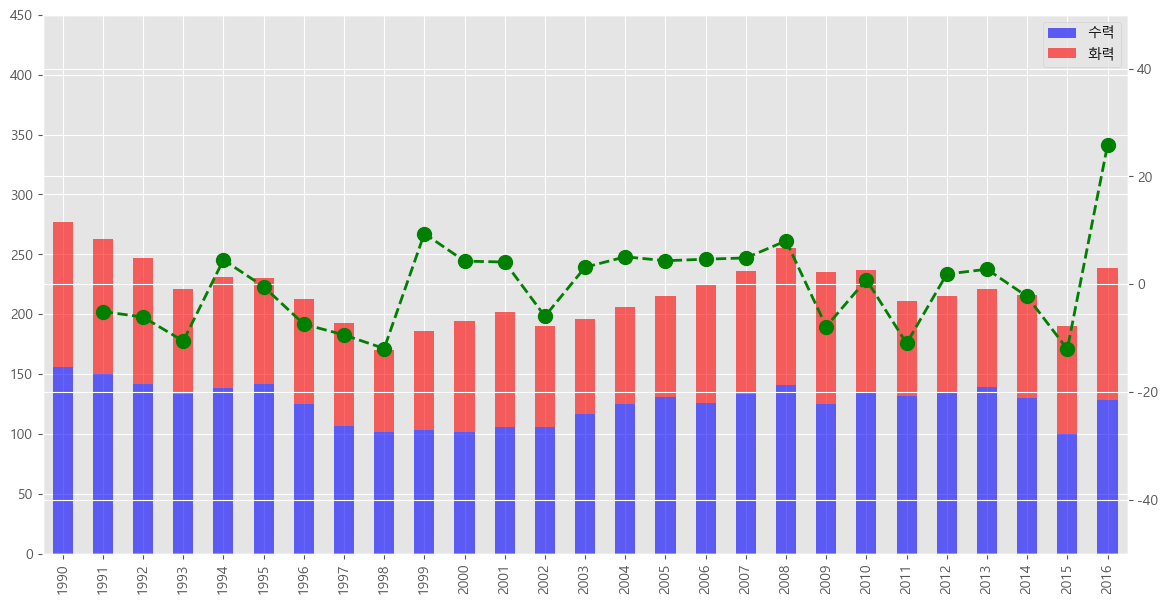

In [83]:
plt.style.use('ggplot')

ax1 = df2_T[['수력','화력']].plot(kind='bar', figsize = (14,7), stacked = True,
                        color = ['blue','red'], alpha = 0.6) #투명도 alpha

#새로운 y축을 증감률으로
ax2 = ax1.twinx()
ax2.plot(df2_T['증감률'],ls ='--',marker ='o',color ='green', linewidth = 2, markersize = 10)
ax1.set_ylim(0,450)
ax2.set_ylim(-50,50)
plt.show()

<Axes: xlabel='weight', ylabel='mpg'>

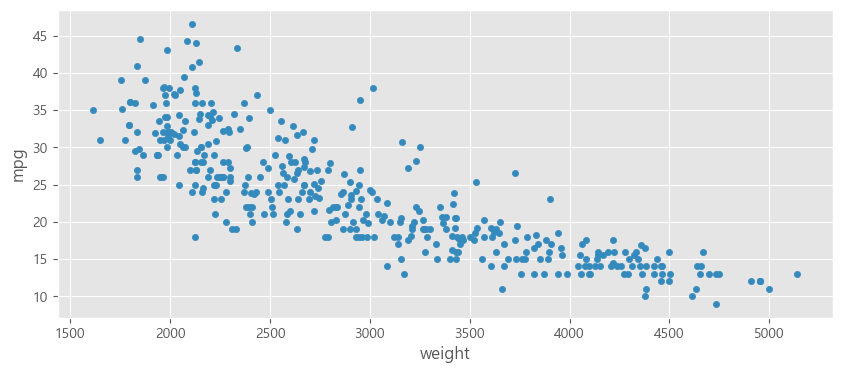

In [84]:
car = pd.read_csv('csv/auto-mpg.csv')
car.plot(kind = 'scatter', x = 'weight', y = 'mpg', figsize = (10,4))

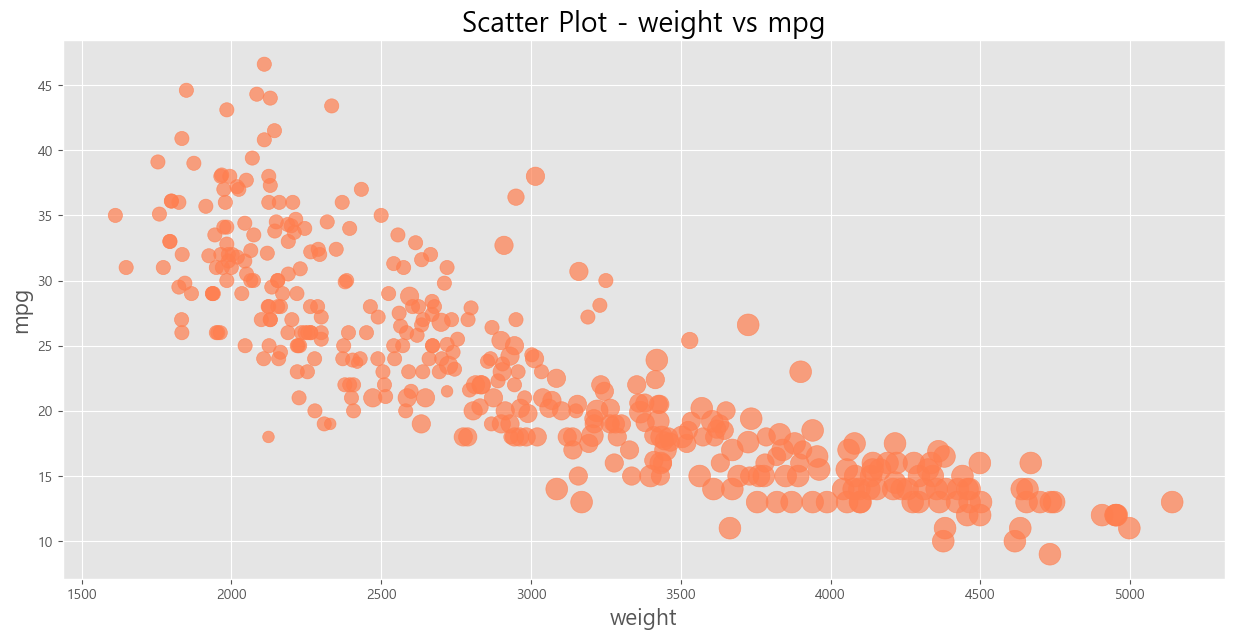

In [90]:
cyl_size = (car['cylinders'] -1) * 35

plt.figure(figsize = (15,7))
plt.scatter(x=car['weight'], y = car['mpg'], c = 'coral' ,s = cyl_size, alpha = 0.7)
plt.xlabel('weight', size = 16)
plt.ylabel('mpg', size = 16)
plt.title('Scatter Plot - weight vs mpg', size = 20)

plt.show()

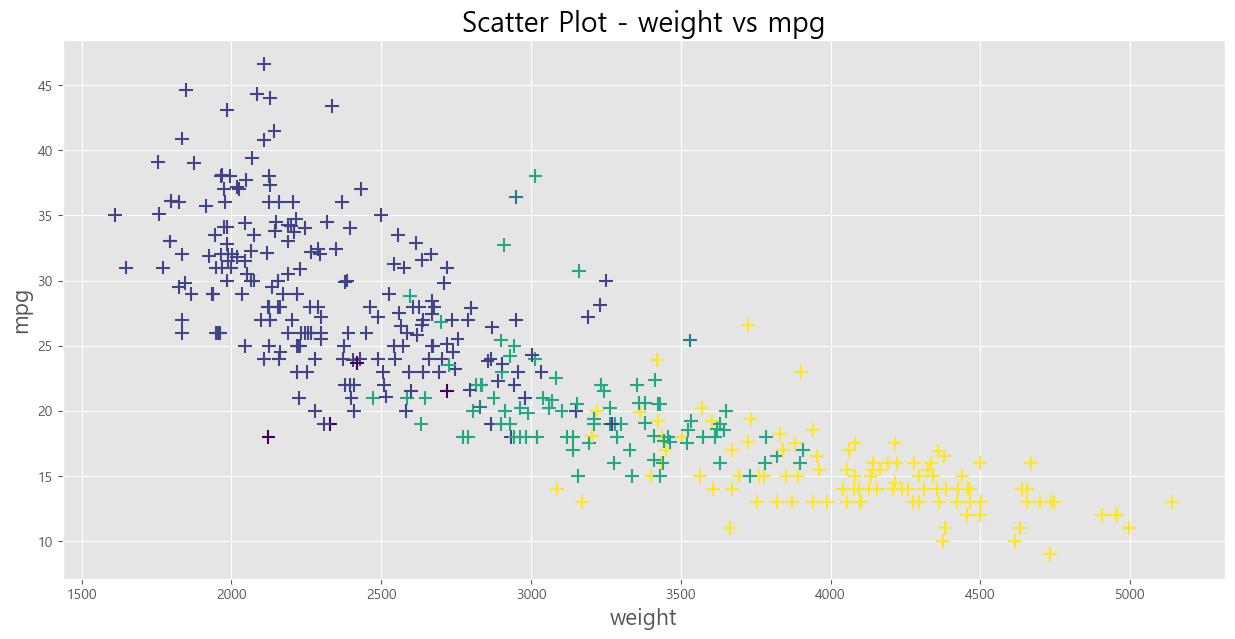

In [92]:
cyl_size = (car['cylinders'] -1) * 35

plt.figure(figsize = (15,7))
plt.scatter(x=car['weight'], y = car['mpg'], marker = '+', s = 100,
           cmap = 'viridis', c = cyl_size) #색상으로 크기를 나타냄



plt.xlabel('weight', size = 16)
plt.ylabel('mpg', size = 16)
plt.title('Scatter Plot - weight vs mpg', size = 20)

plt.show()